In [1]:
# Load pickled data
import pickle, os

# TODO: Fill this in based on where you saved the training and testing data

training_file =   os.path.join(os.getcwd(), './train.p')
validation_file = os.path.join(os.getcwd(), './valid.p')
testing_file =    os.path.join(os.getcwd(), './test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

import numpy as np
from sklearn.utils import shuffle
# Number of training examples
n_train = X_train.shape[0]
n_valid = X_valid.shape[0]
# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples = {0}".format(n_valid))
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32)
Number of classes = 43


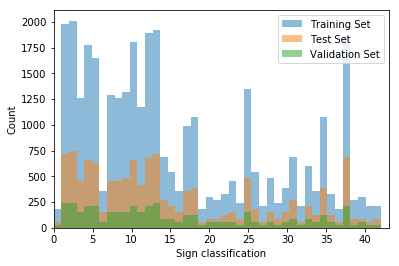

In [3]:
plt.hist(y_train, n_classes, alpha=0.5, label='Training Set')
plt.hist(y_test, n_classes, alpha=0.5, label='Test Set')
plt.hist(y_valid, n_classes, alpha=0.5, label='Validation Set')
plt.xlabel('Sign classification')
plt.ylabel('Count')
plt.xlim(xmin=0, xmax=n_classes)
plt.legend(loc='upper right')
plt.show()

In [4]:
import pandas as pd
sign_names = pd.read_csv('signnames.csv', index_col=0)
sign_names['SignName'][0]

'Speed limit (20km/h)'

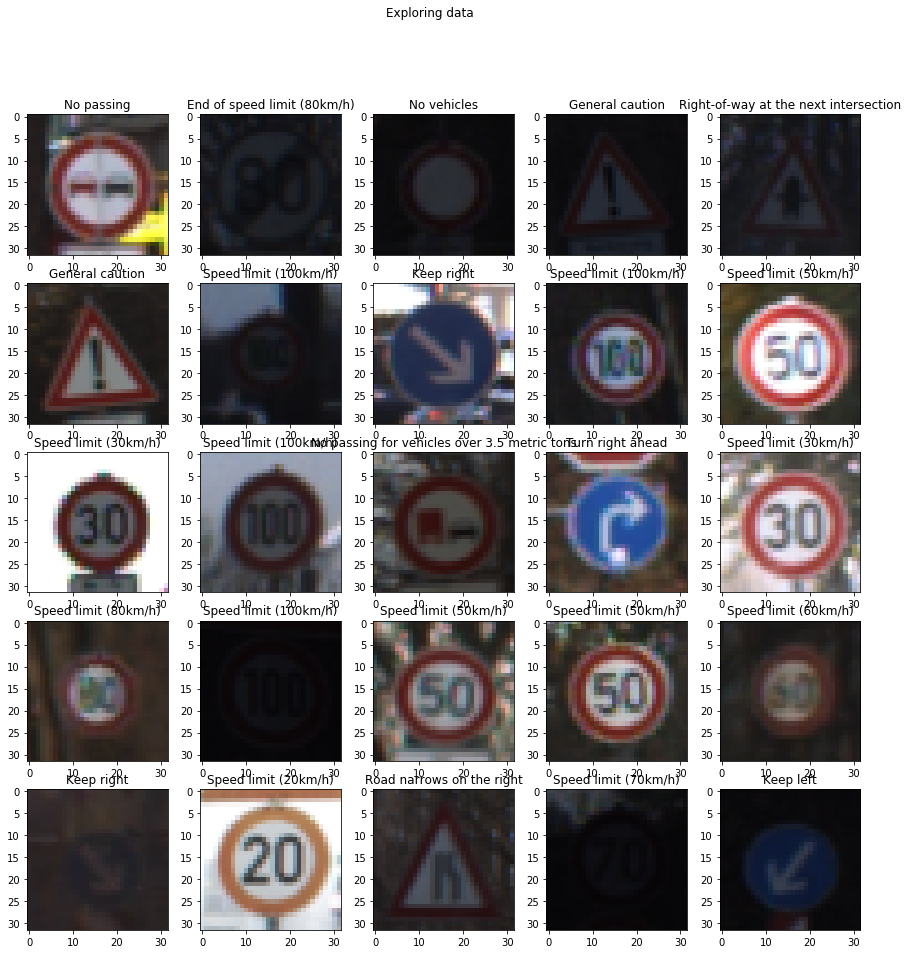

In [5]:
X_train, y_train = shuffle(X_train, y_train)
fig = plt.figure(figsize=(15,15))
fig.suptitle('Exploring data')
for i in range(1,26):
    ax = plt.subplot(5,5,i)
    ax.set_title(sign_names['SignName'][y_train[i]])
    plt.imshow(X_train[i])
plt.show()

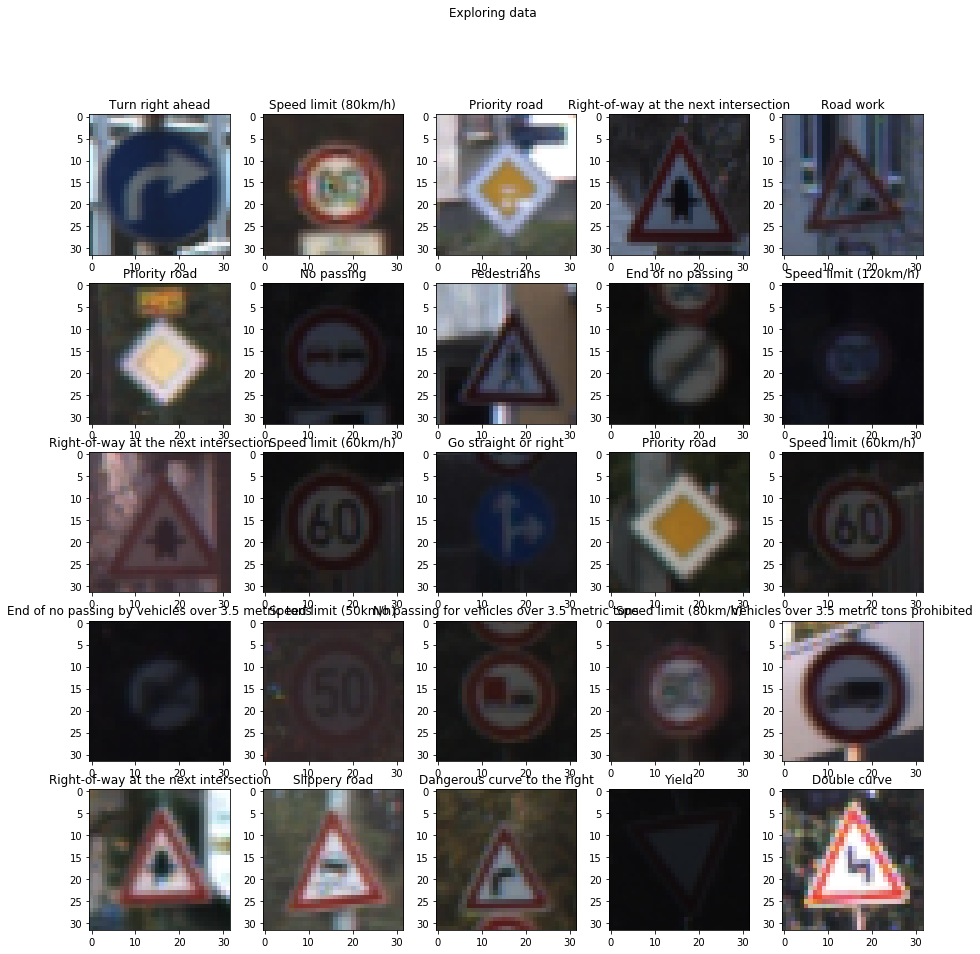

In [6]:
X_valid, y_valid = shuffle(X_valid, y_valid)
fig = plt.figure(figsize=(15,15))
fig.suptitle('Exploring data')
for i in range(1,26):
    ax = plt.subplot(5,5,i)
    ax.set_title(sign_names['SignName'][y_valid[i]])
    plt.imshow(X_valid[i])
plt.show()

In [32]:
def rotate_images(X, deg):
    rows, cols = X.shape[1], X.shape[2]
    M_pos = cv2.getRotationMatrix2D((rows//2, cols//2), deg, 1)
    M_neg = cv2.getRotationMatrix2D((rows//2, cols//2), -1*deg, 1)
    X_rot_pos = np.copy(X)
    X_rot_neg = np.copy(X)
    for i in range(X.shape[0]):
        X_rot_pos[i] = cv2.warpAffine(X[i], M_pos, (rows, cols), borderMode=cv2.BORDER_REPLICATE)
        X_rot_neg[i] = cv2.warpAffine(X[i], M_neg, (rows, cols), borderMode=cv2.BORDER_REPLICATE)
    print('Dataset rotated +/-{0} degrees.'.format(deg))
    return X_rot_pos, X_rot_neg

In [59]:
degrees = 15
X_pos, X_neg = rotate_images(X_train, degrees)
X_train, y_train, X_pos, X_neg = shuffle(X_train, y_train, X_pos, X_neg)
fig = plt.figure(figsize=(12,8))
fig.suptitle('+/-{0} degree rotation'.format(degrees))

ax1 = plt.subplot(231)
ax1.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_pos[0])

ax2 = plt.subplot(232)
ax2.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_train[0])

ax3 = plt.subplot(233)
ax3.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_neg[0])

ax4 = plt.subplot(234)
ax4.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_pos[1])

ax5 = plt.subplot(235)
ax5.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_train[1])

ax6 = plt.subplot(236)
ax6.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_neg[1])
plt.show()

Dataset rotated +/-15 degrees.


MemoryError: 

In [9]:
def amplify_contrast(X):
    X_eq = np.copy(X)
    for i in range(X.shape[0]):
        YCrCb = cv2.cvtColor(X[i], cv2.COLOR_RGB2YCrCb)
        Y, Cr, Cb = cv2.split(YCrCb)
        Y_eq = cv2.equalizeHist(Y)
        YCrCb_eq = cv2.merge((Y_eq, Cr, Cb))
        X_eq[i] = cv2.cvtColor(YCrCb_eq, cv2.COLOR_YCrCb2RGB)
    print('Dataset histogram equalized')
    return X_eq

Dataset histogram equalized


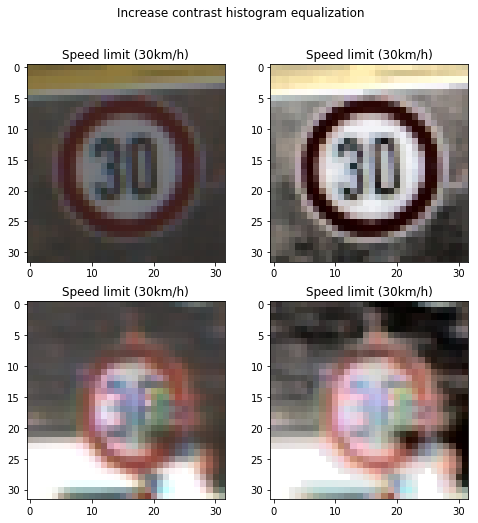

In [10]:
X_histeq = amplify_contrast(X_train)
X_train, y_train, X_histeq = shuffle(X_train, y_train, X_histeq)
fig = plt.figure(figsize=(8,8))
fig.suptitle('Increase contrast histogram equalization')
ax1 = plt.subplot(221)
ax1.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_train[0])

ax2 = plt.subplot(222)
ax2.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_histeq[0])

ax3 = plt.subplot(223)
ax3.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_train[1])

ax4 = plt.subplot(224)
ax4.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_histeq[1])
plt.show()

In [11]:
def clahe_contrast(X):
    X_clahe = np.copy(X)
    clahe = cv2.createCLAHE(tileGridSize=(4,4))
    for i in range(X.shape[0]):
        YCrCb = cv2.cvtColor(X[i], cv2.COLOR_RGB2YCrCb)
        Y, Cr, Cb = cv2.split(YCrCb)
        Y_clahe = clahe.apply(Y)
        YCrCb_clahe = cv2.merge((Y_clahe, Cr, Cb))
        X_clahe[i] = cv2.cvtColor(YCrCb_clahe, cv2.COLOR_YCrCb2RGB)
    print('Dataset histogram equalized clahe')
    return X_clahe

Dataset histogram equalized clahe


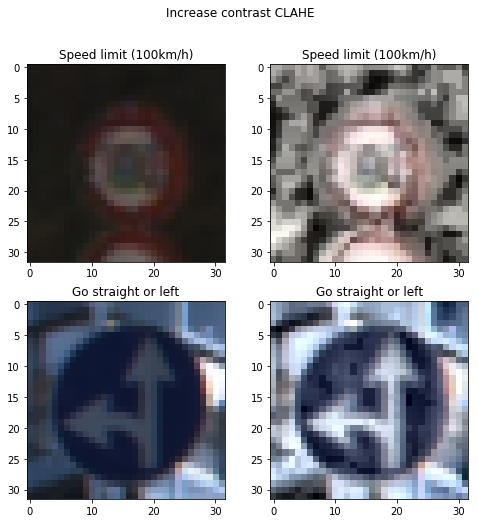

In [12]:
X_clahe = clahe_contrast(X_train)
X_train, y_train, X_clahe = shuffle(X_train, y_train, X_clahe)
fig = plt.figure(figsize=(8,8))
fig.suptitle('Increase contrast CLAHE')

ax1 = plt.subplot(221)
ax1.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_train[0])

ax2 = plt.subplot(222)
ax2.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_clahe[0])

ax3 = plt.subplot(223)
ax3.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_train[1])

ax4 = plt.subplot(224)
ax4.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_clahe[1])
plt.show()

In [13]:
def contrast_normalization(X):
    X_conorm = np.copy(X)
    gauss_1 = cv2.getGaussianKernel(5, 1) + np.transpose(cv2.getGaussianKernel(5, 1))
    gauss_2 = cv2.getGaussianKernel(5, 1.6) + np.transpose(cv2.getGaussianKernel(5, 1.6))
    diff_gauss = gauss_1 - gauss_2
    for i in range(X.shape[0]):    
        X_conorm[i] = X[i] + cv2.filter2D(X[i], -1, diff_gauss)
    print('Contrast normalized')
    return X_conorm

Contrast normalized


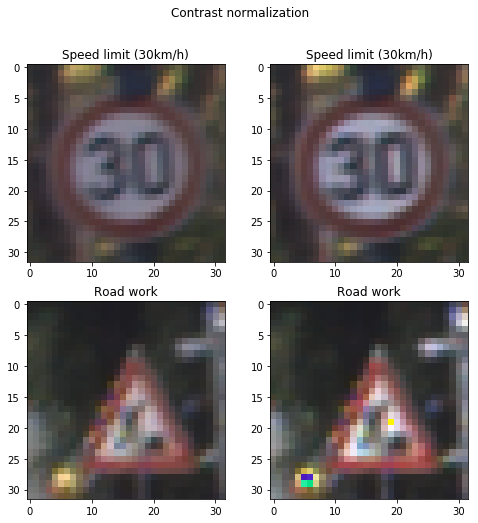

In [14]:
X_conorm = contrast_normalization(X_train)
X_train, y_train, X_conorm = shuffle(X_train, y_train, X_conorm)
fig = plt.figure(figsize=(8,8))
fig.suptitle('Contrast normalization')

ax1 = plt.subplot(221)
ax1.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_train[0])

ax2 = plt.subplot(222)
ax2.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_conorm[0])

ax3 = plt.subplot(223)
ax3.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_train[1])

ax4 = plt.subplot(224)
ax4.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_conorm[1])
plt.show()

In [15]:
def amplify_dataset(X, y):
    X_rot_pos, X_rot_neg = rotate_images(X, 5)
    X = np.concatenate((X, X_rot_neg, X_rot_pos), axis=0)
    y = np.concatenate((y, y, y), axis=0)
    
    X_histeq = amplify_contrast(X)
    X_clahe = clahe_contrast(X)
    X_conorm = contrast_normalization(X)
    X = np.concatenate((X, X_histeq, X_clahe, X_conorm), axis=0)
    y = np.concatenate((y, y, y, y), axis=0)
    print('Number of examples increased to {0}'.format(X.shape[0]))
    return X, y

In [16]:
X_train, y_train = amplify_dataset(X_train, y_train)

Dataset rotated +/-5 degrees.
Dataset histogram equalized
Dataset histogram equalized clahe
Contrast normalized
Number of examples increased to 417588


In [17]:
def grayscale(X):
    X_gray = np.copy(X[:,:,:,0])
    for i in range(X.shape[0]):
        X_gray[i] = cv2.cvtColor(X[i], cv2.COLOR_RGB2GRAY)
    return X_gray

In [18]:
#Normalize the data
def normalize(X):
    X = X.astype('float64') - np.mean(X, axis=0)
    X /= np.std(X, axis=0)
    return X

In [19]:
def preprocess(X):
    X_gray = grayscale(X)
    X_norm = normalize(X_gray)
    return X_norm

In [20]:
X_train = preprocess(X_train)
X_valid = preprocess(X_valid)

### Model Architecture

In [21]:
import tensorflow as tf
print(tf.__version__)

1.0.0


In [22]:
def weight_variable(shape):
    return tf.Variable(tf.truncated_normal(shape, mean=0.01, stddev=0.1))
def bias_variable(shape):
    return tf.Variable(tf.zeros(shape=shape))

In [23]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='VALID')
def conv2d_same(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')
def max_pool(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1],strides=[1,2,2,1], 
                          padding='VALID')

In [24]:
def SketchNet(input_layer, dropout, num_classes=43):
    
#     depth = [1, 6, 16, 400, 160, 96, num_classes]
    input_layer = tf.reshape(x, [-1,32,32, 1])
    print('Layer 0 Init: Shape {}'.format(input_layer.get_shape()))
    
    F_w_1 = weight_variable([3,3,1,20])
    F_b_1 = bias_variable([20])
    conv_1 = tf.nn.relu(conv2d_same(input_layer, F_w_1) + F_b_1)
    print('Layer 1 Convolution: Shape {}'.format(conv_1.get_shape()))
    pool_1 = max_pool(conv_1)
    print('Layer 2 Pooling: Shape {}'.format(pool_1.get_shape()))
    
    F_w_2 = weight_variable([3,3,20,60])
    F_b_2 = bias_variable([60])
    conv_2 = tf.nn.relu(conv2d_same(pool_1, F_w_2) + F_b_2)
    print('Layer 3 Convolution: Shape {}'.format(conv_2.get_shape()))
    pool_2 = max_pool(conv_2)
    print('Layer 4 Pooling: Shape {}'.format(pool_2.get_shape()))
    
    F_w_2b = weight_variable([3,3,60,100])
    F_b_2b = bias_variable([100])
    conv_2b = tf.nn.relu(conv2d_same(pool_2, F_w_2b) + F_b_2b)
    print('Layer 5 Convolution: Shape {}'.format(conv_2b.get_shape()))
    pool_2b = max_pool(conv_2b)
    print('Layer 6 Pooling: Shape {}'.format(pool_2b.get_shape()))
    
    dense_1 = tf.contrib.layers.flatten(pool_2b)
    print('Layer 7 Flatten: Shape {}'.format(dense_1.get_shape()))
    
    drop_1 = tf.nn.dropout(dense_1, dropout)
    
    F_w_3 = weight_variable([1600, 400])
    F_b_3 = bias_variable([400])
    dense_2 = tf.nn.relu(tf.matmul(drop_1, F_w_3) + F_b_3)
    print('Layer 8 Matrix Multiplication: Shape {}'.format(dense_2.get_shape()))
    
    F_w_4 = weight_variable([400, 100])
    F_b_4 = bias_variable([100])
    dense_3 = tf.nn.relu(tf.matmul(dense_2, F_w_4) + F_b_4)
    print('Layer 9 Matrix Multiplication: Shape {}'.format(dense_3.get_shape()))
    
    F_w_5 = weight_variable([100, n_classes])
    F_b_5 = bias_variable([n_classes])
    logits = tf.nn.relu(tf.matmul(dense_3, F_w_5) + F_b_5)
    print('Final Layer Matrix Multiplication: Shape {}'.format(logits.get_shape()))
    
    return logits

In [25]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
# x = tf.constant(X_train_rot_gray)
one_hot_y = tf.one_hot(y, n_classes)

rate = 0.0001
pred = SketchNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits= pred, 
                                                        labels= one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(one_hot_y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Layer 0 Init: Shape (?, 32, 32, 1)
Layer 1 Convolution: Shape (?, 32, 32, 20)
Layer 2 Pooling: Shape (?, 16, 16, 20)
Layer 3 Convolution: Shape (?, 16, 16, 60)
Layer 4 Pooling: Shape (?, 8, 8, 60)
Layer 5 Convolution: Shape (?, 8, 8, 100)
Layer 6 Pooling: Shape (?, 4, 4, 100)
Layer 7 Flatten: Shape (?, 1600)
Layer 8 Matrix Multiplication: Shape (?, 400)
Layer 9 Matrix Multiplication: Shape (?, 100)
Final Layer Matrix Multiplication: Shape (?, 43)


In [28]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        batch_y = y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_op, feed_dict={x: batch_x,
                                                    y: batch_y,
                                                    keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [29]:
import time
epoch_accuracy = []
EPOCHS = 1000
BATCH_SIZE = 256
save_file = './test_model5.ckpt'
saver = tf.train.Saver()
# print('Saver successfully created')
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    cur_time = time.time()
    for epoch in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, n_train, BATCH_SIZE):
            images_feed= X_train[offset:offset+BATCH_SIZE]
            labels_feed = y_train[offset:offset+BATCH_SIZE]
            _, loss_value = sess.run([training_operation, loss_operation], 
                                     feed_dict={x: images_feed, y: labels_feed, keep_prob: 0.5})
        if (epoch+1) % 10 == 0:
            validation_accuracy = evaluate(X_valid, y_valid)
            epoch_accuracy.append(validation_accuracy)
            prev_time = cur_time
            cur_time = time.time()
            print('EPOCH {}'.format(epoch+1))
            print('Loss Value {}'.format(loss_value))
            print('Validation Accuracy = {:.3f}'.format(validation_accuracy))
            print('Time/epoch {0} s\n'.format((cur_time - prev_time)/10))
    saver.save(sess, save_file)

EPOCH 10
Loss Value 3.528148889541626
Validation Accuracy = 0.144
Time/epoch 14.895491814613342 s

EPOCH 20
Loss Value 2.899362564086914
Validation Accuracy = 0.265
Time/epoch 14.87372887134552 s

EPOCH 30
Loss Value 1.7287611961364746
Validation Accuracy = 0.519
Time/epoch 14.953878331184388 s

EPOCH 40
Loss Value 1.1600271463394165
Validation Accuracy = 0.703
Time/epoch 14.915937852859496 s

EPOCH 50
Loss Value 0.6178228855133057
Validation Accuracy = 0.796
Time/epoch 14.959138631820679 s

EPOCH 60
Loss Value 0.6122769117355347
Validation Accuracy = 0.842
Time/epoch 15.16740961074829 s

EPOCH 70
Loss Value 0.29479143023490906
Validation Accuracy = 0.864
Time/epoch 14.961090016365052 s

EPOCH 80
Loss Value 0.3121137320995331
Validation Accuracy = 0.876
Time/epoch 15.152969717979431 s

EPOCH 90
Loss Value 0.22529934346675873
Validation Accuracy = 0.891
Time/epoch 15.02667031288147 s

EPOCH 100
Loss Value 0.16478051245212555
Validation Accuracy = 0.898
Time/epoch 15.140700626373292 s

E

In [51]:
epochs = np.arange(10,1001,10)
accuracy = pd.DataFrame({'Epoch': epochs, 
                         'Accuracy': epoch_accuracy})
accuracy
accuracy.to_csv('accuracy_testmodel4.csv', index=False)

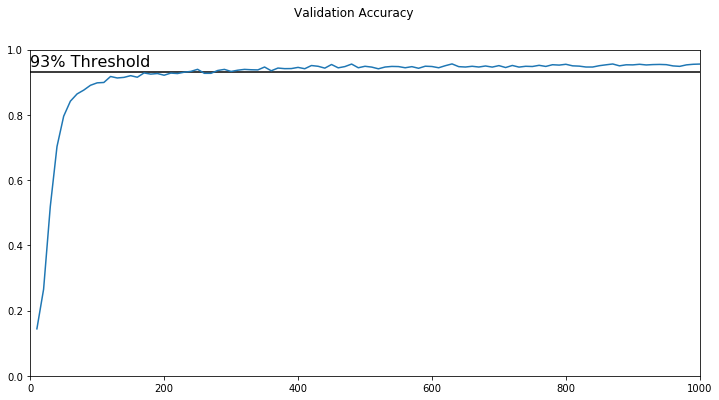

In [82]:
accuracy = pd.read_csv('accuracy_testmodel4.csv')
fig = plt.figure(figsize=(12,6))
fig.suptitle('Validation Accuracy')
ax1 = plt.subplot(111)
ax1.set_xlim(left=0, right=1000)
ax1.set_ylim(top=1.0, bottom=0.0)
plt.plot((0,1000),(.93,.93), 'k-')
plt.text(0,.95, '93% Threshold', fontsize=16)
plt.plot(accuracy['Epoch'], accuracy['Accuracy'])